<a href="https://colab.research.google.com/github/Daniel1020/Nano-Degree-Projects/blob/master/Time_Series_Modeling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import statsmodels.api as sm
import statsmodels.formula.api as smf
import statsmodels.tsa.api as smt

%matplotlib inline

In [0]:
url='https://raw.githubusercontent.com/Daniel1020/Tutorial-Arima-w-jeffrey-yau/master/data/international-airline-passengers.csv'
dat = pd.read_csv(url,parse_dates=['Month'])

In [4]:
dat.head()

,Month,n_pass_thousands
0,1949-01-01,112
1,1949-02-01,118
2,1949-03-01,132
3,1949-04-01,129
4,1949-05-01,121


AttributeError: ignored

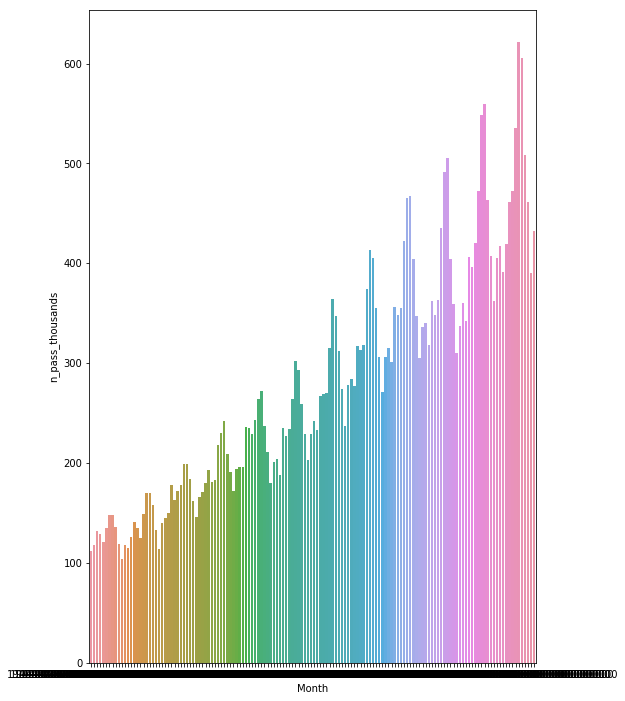

In [17]:
ax,fig= plt.subplots(figsize=(8,12))

sns.barplot(x='Month',y='n_pass_thousands',data=dat)

ax.set_title('International airline passengers, 1949-1960');
ax.set_ylabel('Thousands of passengers');
ax.set_xlabel('Year');
ax.xaxis.set_ticks_position('bottom')
fig.tight_layout();


In [0]:
dat['year'] = dat['Month'].apply(lambda x: x.year)

In [0]:
year_grp= dat.groupby('year')['n_pass_thousands'].agg('sum').reset_index()

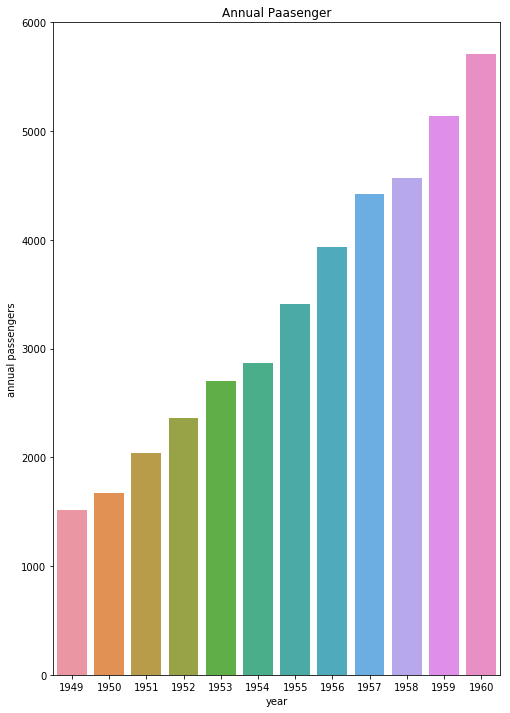

In [34]:
## bar Plot for annual passengers
ax,fig = plt.subplots(figsize=(8,12))

ax= sns.barplot(x='year',y='n_pass_thousands',data=year_grp)

ax.set_title('Annual Paasenger')
ax.set_xlabel('year')
ax.set_ylabel('annual passengers')
plt.show()

In [0]:
url='https://raw.githubusercontent.com/Daniel1020/Tutorial-Arima-w-jeffrey-yau/master/data/mixedGLB.Ts.ERSSTV4.GHCN.CL.PA.csv'
dat2 = pd.read_csv(url,header=1,index_col=0,parse_dates=[0])

In [0]:
dat2['avg']=dat2.iloc[:,:12].mean(axis=1)

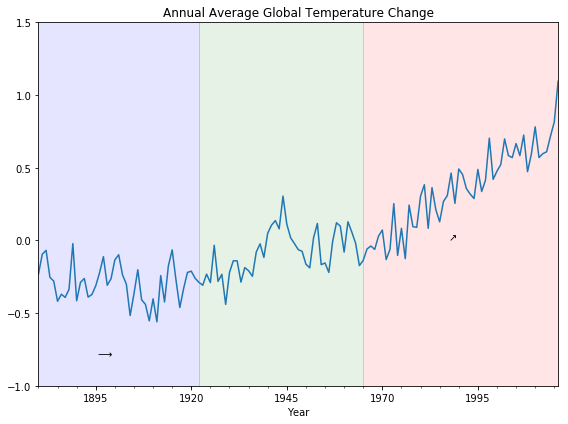

In [44]:
fig, ax = plt.subplots(figsize=(8, 6));

dat2['avg'].plot(ax=ax);

ax.set_title('Annual Average Global Temperature Change');

ylim = (-1.0, 1.5)
ax.set_ylim(ylim)

ax.fill_betweenx(ylim, dat2.index[0], pd.Timestamp('1922'), alpha=.1, zorder=-1, color='b');
ax.fill_betweenx(ylim, pd.Timestamp('1922'), pd.Timestamp('1965'), alpha=.1, zorder=-1, color='g');
ax.fill_betweenx(ylim, pd.Timestamp('1965'), dat2.index[-1], alpha=.1, zorder=-1, color='r');

ax.annotate('$\\longrightarrow$', (dat2.index[15], -0.8));
ax.annotate('$\\nearrow$', (dat2.index[-30], 0));
ax.xaxis.set_ticks_position('bottom')
fig.tight_layout();

In [45]:
dat2 

,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,J-D,D-N,DJF,MAM,JJA,SON,avg
Year,,,,,,,,,,,,,,,,,,,
1880-01-01,-0.30,-0.20,-0.18,-0.28,-0.14,-0.29,-.24,-.08,-.17,-.16,-.19,-.21,-.20,***,***,-0.20,-.20,-.17,-0.231667
1881-01-01,-0.09,-0.14,0.01,-0.03,-0.04,-0.28,-.06,-.02,-.09,-.19,-.26,-.15,-.11,-.12,-.15,-0.02,-.12,-.18,-0.095000
1882-01-01,0.10,0.09,0.02,-0.20,-0.17,-0.25,-.10,.04,-.01,-.22,-.21,-.25,-.10,-.09,.01,-0.12,-.10,-.14,-0.068333
1883-01-01,-0.33,-0.42,-0.17,-0.24,-0.25,-0.11,-.08,-.13,-.18,-.11,-.20,-.18,-.20,-.20,-.33,-0.22,-.11,-.16,-0.253333
1884-01-01,-0.18,-0.11,-0.34,-0.36,-0.31,-0.38,-.34,-.25,-.23,-.22,-.30,-.29,-.27,-.27,-.15,-0.34,-.32,-.25,-0.280000


In [0]:
#@title Default title text
dat2= dat2.reset_index()

In [0]:
dat2['year']= dat2['Year'].apply(lambda x: x.year)

In [0]:
year_avg= dat2.groupby('year').agg({
    'avg': lambda x: x.mean()
})

In [59]:
year_avg.head()

,avg
year,
1880,-0.231667
1881,-0.095000
1882,-0.068333
1883,-0.253333
1884,-0.280000


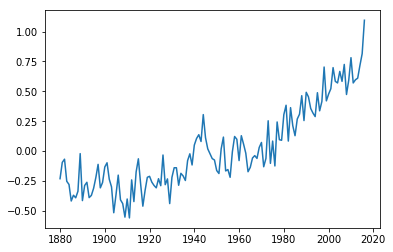

In [61]:
plt.plot(year_avg)